# Logistic Regression

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Train data

In [4]:
data=pd.read_csv("Titanic_train.csv")

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Display summary statistics
summary_stats = data.describe()
print(summary_stats)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


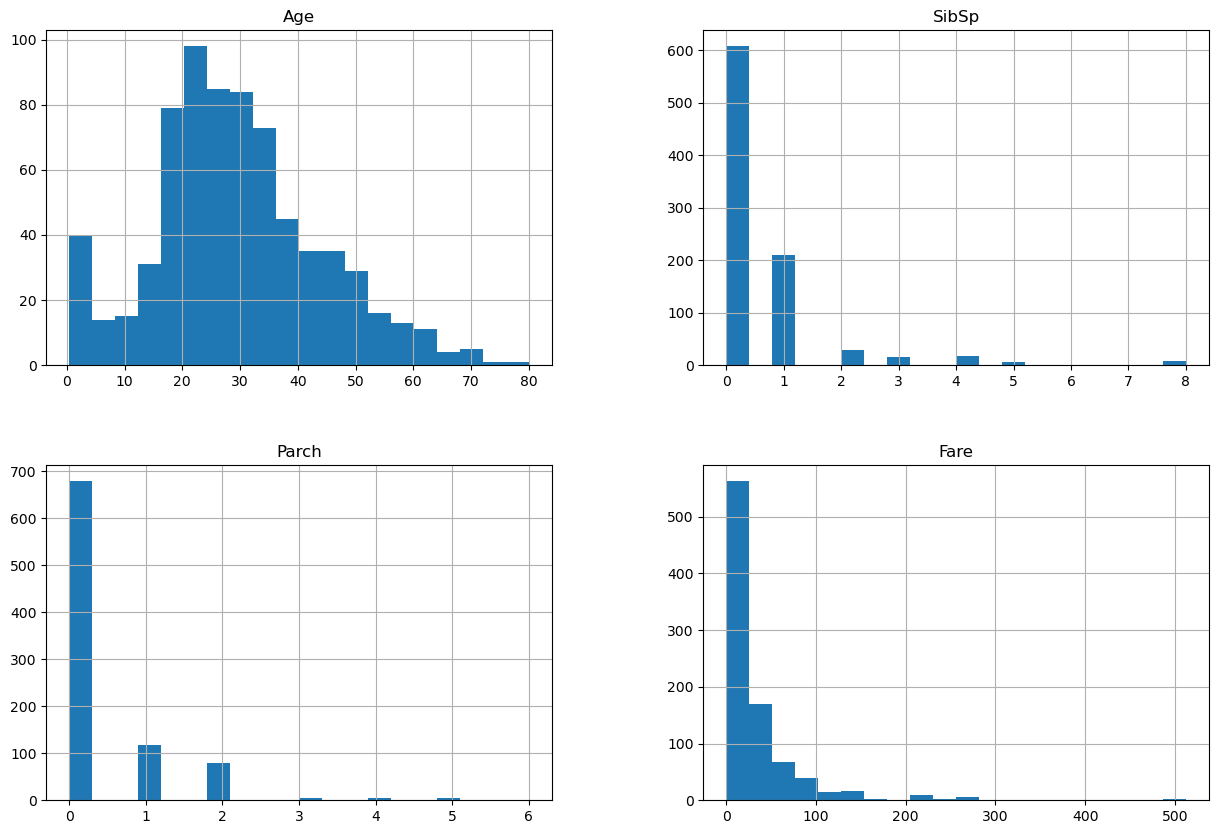

In [12]:
# Visualizations
# Histograms for numerical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()

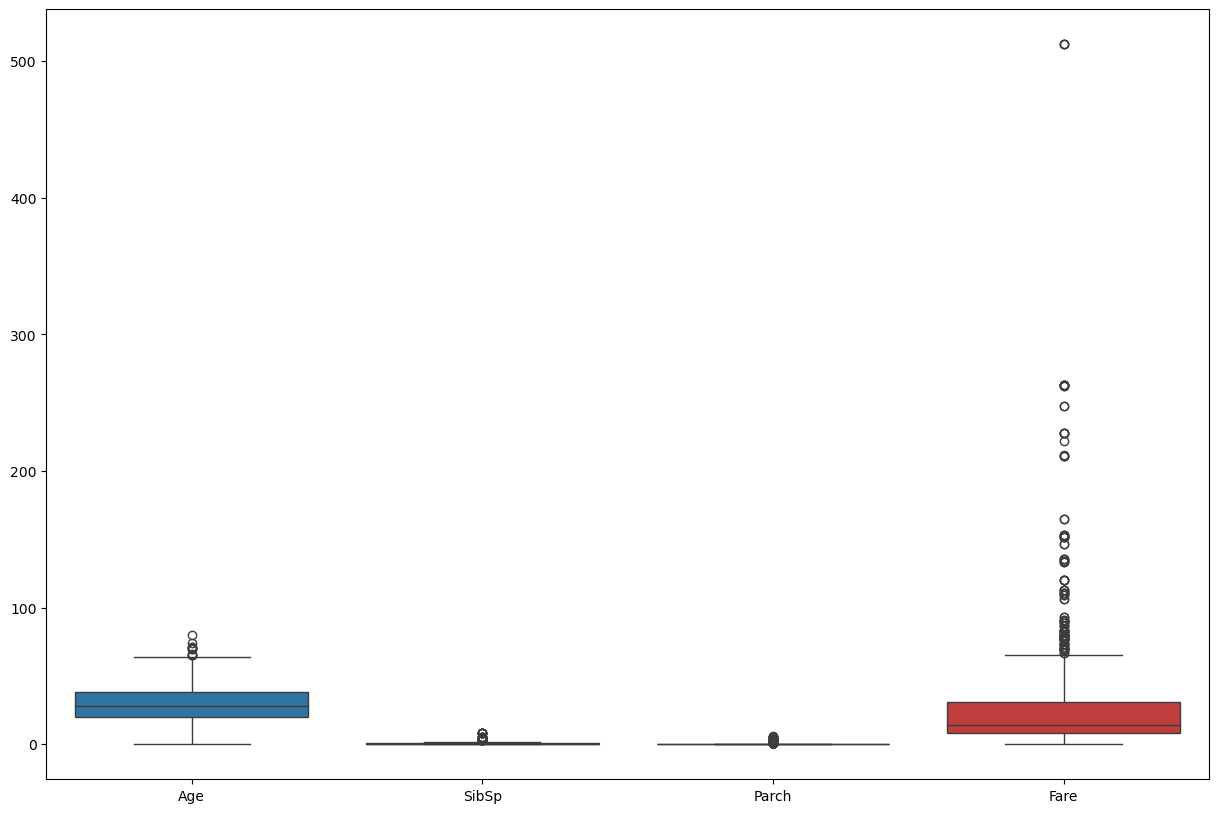

In [13]:
# Box plot for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[numerical_features])
plt.show()

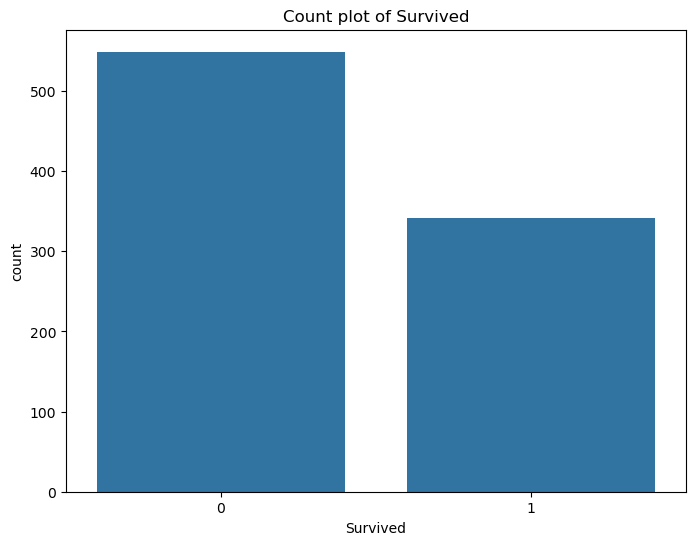

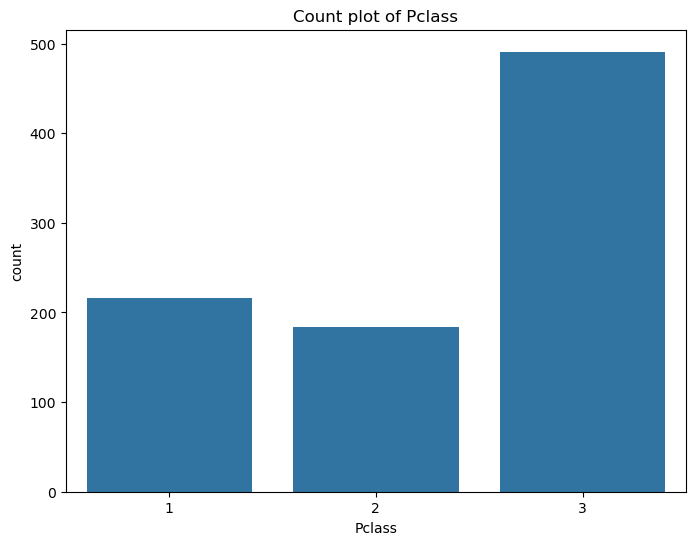

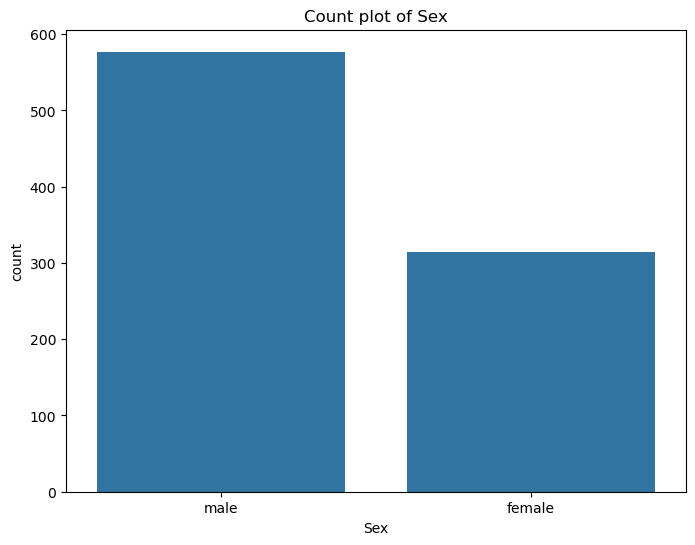

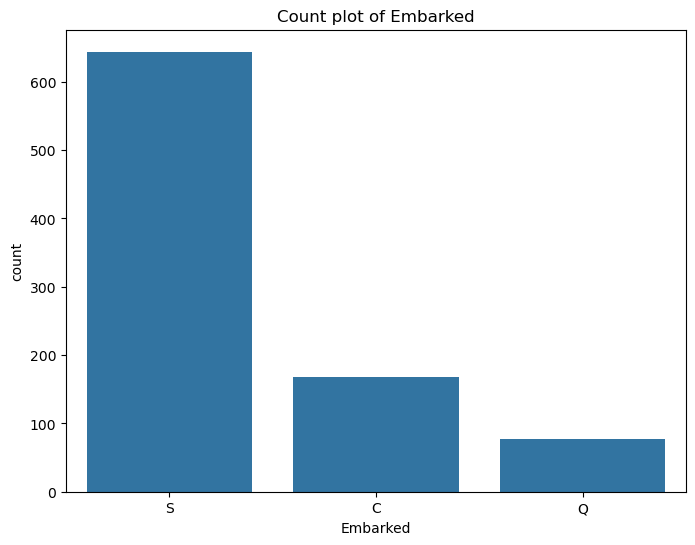

In [14]:
# Count plot for categorical features
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f'Count plot of {feature}')
    plt.show()

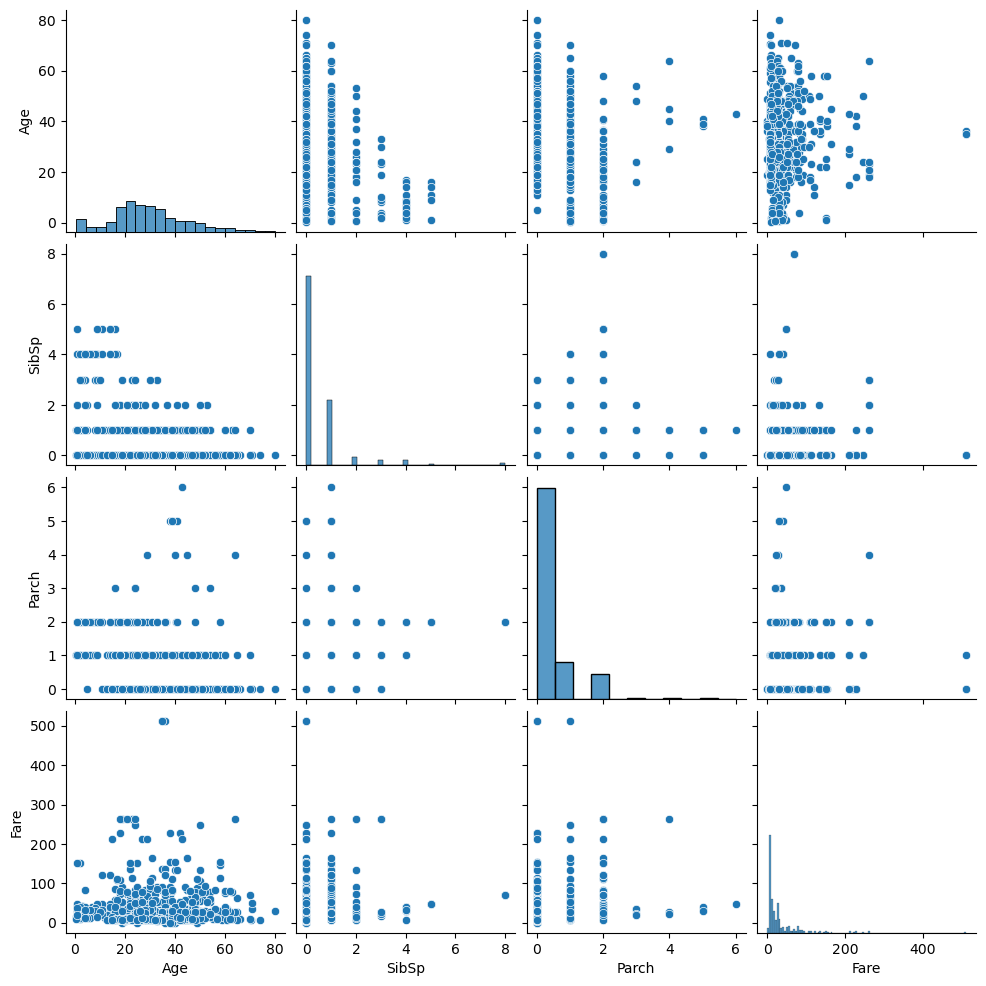

In [15]:
# Pair plot to visualize relationships between numerical features
sns.pairplot(data[numerical_features])
plt.show()

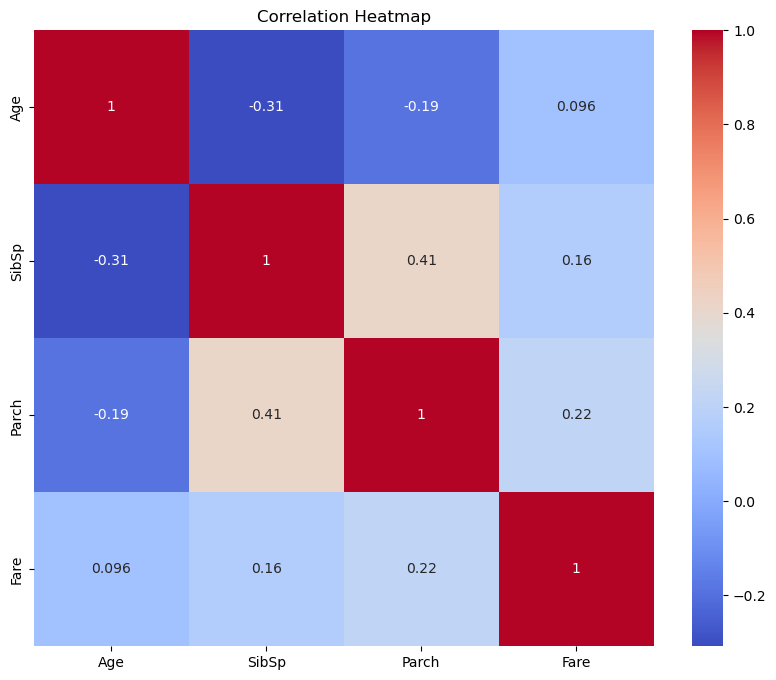

In [16]:

# Heatmap to visualize correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Handle missing values
# Impute missing values for numerical features with mean or median
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

C:\Users\mohdr\AppData\Local\Temp\ipykernel_11252\3752660049.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\mohdr\AppData\Local\Temp\ipykernel_11252\3752660049.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [18]:

# For categorical feature 'Embarked', impute missing values with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

C:\Users\mohdr\AppData\Local\Temp\ipykernel_11252\3930869153.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [19]:

# Drop 'Cabin' feature due to high number of missing values
data.drop('Cabin', axis=1, inplace=True)


In [20]:

# Encode categorical variables
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Test data

In [22]:
test_data= pd.read_csv(r"C:\Users\mohdr\OneDrive\Desktop\Titanic_test.csv")

In [23]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
test_data.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [26]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:

# Check for missing values
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


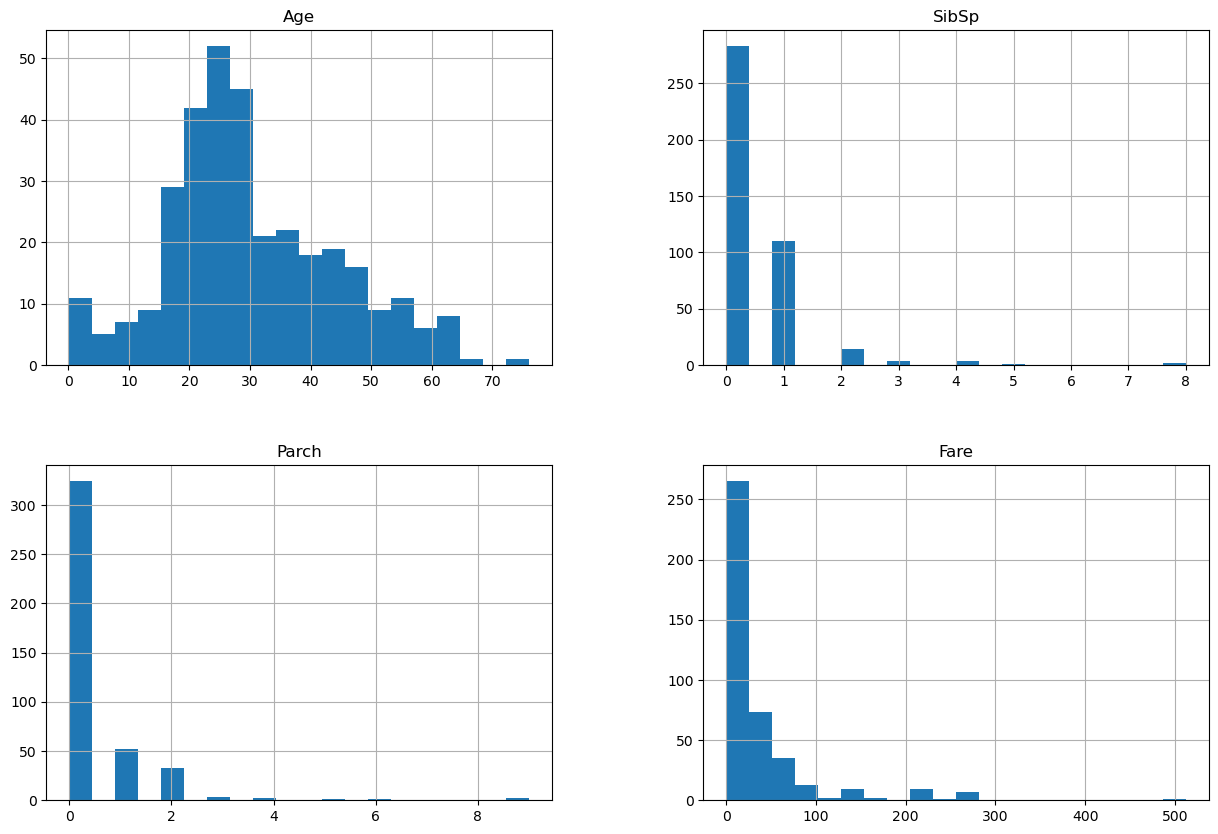

In [29]:
# Visualizations
# Histograms for numerical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
test_data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()

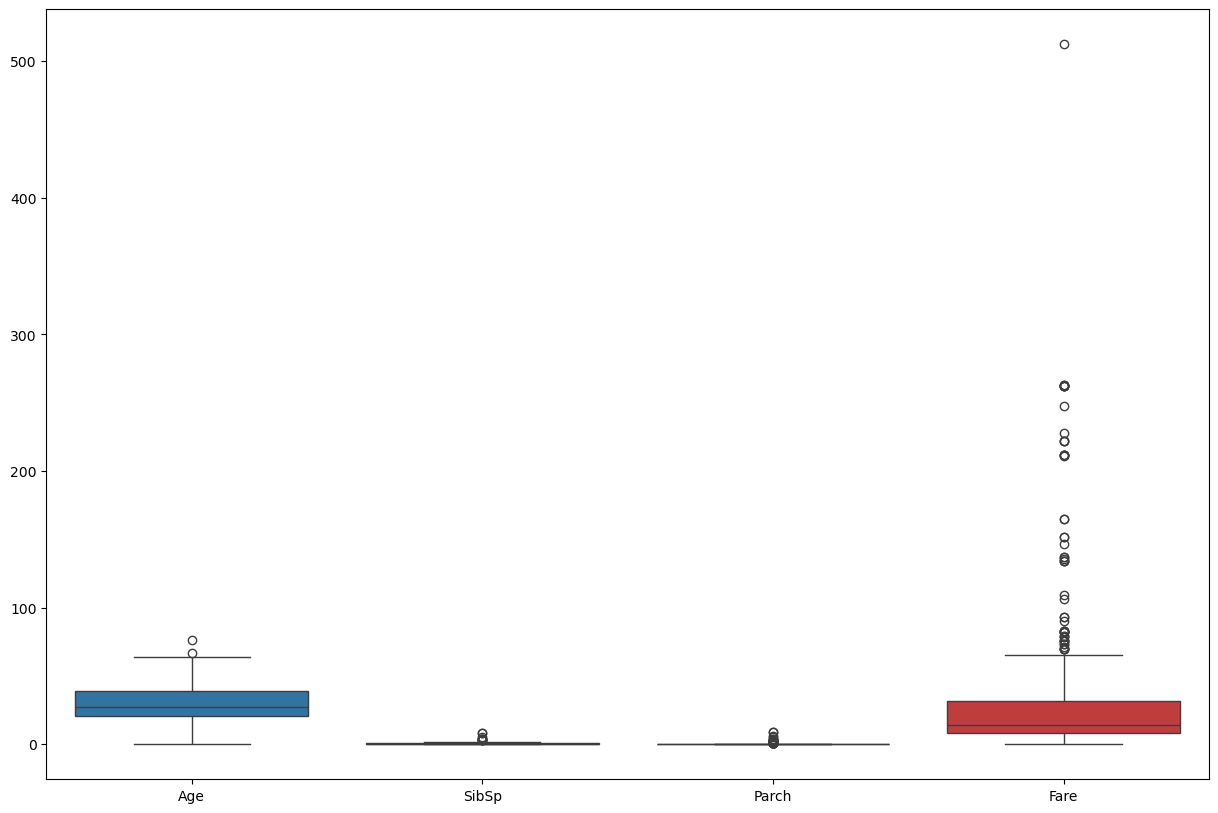

In [30]:
# Box plot for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=test_data[numerical_features])
plt.show()

In [31]:
# Handle missing values
# Impute missing values for numerical features with mean or median
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

C:\Users\mohdr\AppData\Local\Temp\ipykernel_11252\1086301356.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
C:\Users\mohdr\AppData\Local\Temp\ipykernel_11252\1086301356.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [32]:

# For categorical feature 'Embarked', impute missing values with the mode
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

C:\Users\mohdr\AppData\Local\Temp\ipykernel_11252\1408400678.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)


In [33]:
# Drop 'Cabin' feature due to high number of missing values
test_data.drop('Cabin', axis=1, inplace=True)

In [34]:
# Encode categorical variables
# Convert categorical variables into dummy/indicator variables
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [36]:
X_test=test_data.drop(['PassengerId', 'Name', 'Ticket'],axis=1)

In [48]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,False,False


In [50]:
test_data

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,True,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",27.0,0,0,A.5. 3236,8.0500,True,False,True
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,False,False,False
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,True,False,True
416,1308,3,"Ware, Mr. Frederick",27.0,0,0,359309,8.0500,True,False,True


In [76]:
X_train = data.drop(['PassengerId', 'Name', 'Ticket', 'Survived'],axis=1)  # Features
y_train = data['Survived']  # Target labels

# For test dataset
X_test =test_data.drop(['PassengerId', 'Name', 'Ticket'],axis=1)


# Applying Logistic Regression

In [78]:
# Initialize logistic regression model
logreg_model = LogisticRegression()

In [80]:
# Train the model
logreg_model.fit(X_train, y_train)

C:\Users\mohdr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

In [102]:
# Add predictions to the test dataframe
test_data['predictions'] = y_pred
print(test_data)

     PassengerId  Pclass                                          Name   Age  \
0            892       3                              Kelly, Mr. James  34.5   
1            893       3              Wilkes, Mrs. James (Ellen Needs)  47.0   
2            894       2                     Myles, Mr. Thomas Francis  62.0   
3            895       3                              Wirz, Mr. Albert  27.0   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0   
..           ...     ...                                           ...   ...   
413         1305       3                            Spector, Mr. Woolf  27.0   
414         1306       1                  Oliva y Ocana, Dona. Fermina  39.0   
415         1307       3                  Saether, Mr. Simon Sivertsen  38.5   
416         1308       3                           Ware, Mr. Frederick  27.0   
417         1309       3                      Peter, Master. Michael J  27.0   

     SibSp  Parch              Ticket  

In [90]:
from sklearn.model_selection import cross_val_score

# since test dataset dont have target variable we do cross validation score

In [92]:
cv_scores = cross_val_score(logreg_model, X_train, y_train, cv=5)  # 5-fold cross-validation

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.79329609 0.78651685 0.78089888 0.76966292 0.83146067]
Mean Cross-Validation Score: 0.7923670830456343


C:\Users\mohdr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mohdr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

# Deployment

In [ ]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib

# Function to preprocess input data
def preprocess_input_data(df):
    # Handle missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df.drop('Cabin', axis=1, inplace=True)
    
    # Encode categorical variables
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])
    df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
    
    return df

# Function to train the model
def train_model(df):
    # Separate features and target variable
    X = df.drop(['Survived'], axis=1)
    y = df['Survived']
    
    # Preprocess input data
    X = preprocess_input_data(X)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize logistic regression model
    logreg_model = LogisticRegression()
    
    # Train the model
    logreg_model.fit(X_train, y_train)
    
    # Evaluate the model
    accuracy = logreg_model.score(X_test, y_test)
    
    return logreg_model, accuracy

# Streamlit app
def main():
    st.title('Titanic Survival Prediction')
    
    st.sidebar.header('Training the Model')
    
    # Upload dataset
    uploaded_file = st.sidebar.file_uploader("Upload CSV file", type=["csv"])
    
    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
        st.sidebar.success('Dataset successfully uploaded.')
        st.sidebar.subheader('Sample of the dataset:')
        st.sidebar.write(df.head())
        
        if st.sidebar.button('Train Model'):
            try:
                model, accuracy = train_model(df)
                st.success(f'Model trained with accuracy: {accuracy:.2f}')
            except Exception as e:
                st.error(f'Error occurred while training the model: {e}')
            
            # Option to save the trained model
            if st.sidebar.button('Save Model'):
                model_path = 'trained_model.pkl'
                joblib.dump(model, model_path)
                st.success(f'Model saved as {model_path}')

    st.sidebar.header('User Input Features')
    
    # Collect user input features
    def collect_user_input():
        sex = st.sidebar.selectbox('Sex', ['male', 'female'])
        age = st.sidebar.slider('Age', 0, 100, 30)
        pclass = st.sidebar.selectbox('Pclass', [1, 2, 3])
        sibsp = st.sidebar.slider('Siblings/Spouses Aboard', 0, 10, 0)
        parch = st.sidebar.slider('Parents/Children Aboard', 0, 10, 0)
        fare = st.sidebar.slider('Fare', 0, 100, 10)
        embarked = st.sidebar.selectbox('Embarked', ['C', 'Q', 'S'])
        
        # Create a dictionary with user input
        user_input = {
            'Sex': sex,
            'Age': age,
            'Pclass': pclass,
            'SibSp': sibsp,
            'Parch': parch,
            'Fare': fare,
            'Embarked': embarked
        }
        
        return pd.DataFrame([user_input])
    
    input_df = collect_user_input()
    
    if st.sidebar.button('Predict'):
        try:
            model_path = 'trained_model.pkl'
            model = joblib.load(model_path)
            prediction = model.predict(preprocess_input_data(input_df))
            if prediction[0] == 1:
                st.success('The passenger is predicted to survive!')
            else:
                st.error('The passenger is predicted not to survive.')
            st.dataframe(input_df)
        except Exception as e:
            st.error(f'Error occurred while loading the model: {e}')

if __name__ == '__main__':
    main()


Interview Questions:
1. What is the difference between precision and recall?

Precision and recall are both important metrics in evaluating the performance of a classification model, but they capture different aspects.

Precision is the ratio of correctly predicted positive observations to the total predicted positives. 
It answers the question: Of all instances that were predicted as positive, how many were actually positive? 
High precision means that there are very few false positives.

Recall (or sensitivity) is the ratio of correctly predicted positive observations to all the actual positives. 
It answers the question: Of all the instances that were actually positive, how many did we correctly predict as positive? 
High recall means that there are very few false negatives.

In short:

Precision is about the accuracy of positive predictions.

Recall is about the coverage of actual positives.